[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar09/ml_kidney_stones/blob/main/ml_kidney_stones_README.ipynb)



Este notebook describe a traves de ejemplos las clases que son parte el proyecto de "ml_kidney_stones".

In [ ]:
# Carga el proyecto de ml_kidney_stones
!rm -r ml_kidney_stones
GIT_PATH = "https://b5d855b5170d85046de2b73eb566937c894aec67@github.com/oscar09/ml_kidney_stones.git"
!cd /content/ && git clone "{GIT_PATH}"

Cloning into 'ml_kidney_stones'...
remote: Enumerating objects: 151, done.
remote: Counting objects: 100% (151/151), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 350 (delta 96), reused 26 (delta 13), pack-reused 199
Receiving objects: 100% (350/350), 9.11 MiB | 2.77 MiB/s, done.
Resolving deltas: 100% (213/213), done.


# Clase ImageManager

La clase imageManager sirve para reorganizar el dataset de imagenenes en "train" y "test", ya que asi lo espera el dataloader de pytorch. El constructor de la clase recibe como parametros la ruta en donde se guardaran las imagenes, el porcentaje de imagenes que seran utilizadas para prueba (carpeta de "test") y, de manera opcional, un arreglo "merge" que contiene las carpetas que se fusionaran. 




In [ ]:
import ml_kidney_stones.helpers.ImageManager as kim

El siguiente codigo descarga el dataset de imagenes que sera usado como ejemplo. Las imagenes se guardan en la carpeta "input_images".

In [ ]:
!rm -R input_images # borra el folder en caso de que ya exista.

!gdown --id "1gD_YHFLuB7HZOG8lRjphD8VjqFHoBd0h" -O tmp.zip
!unzip -qq tmp.zip -d "input_images"


Downloading...
From: https://drive.google.com/uc?id=1gD_YHFLuB7HZOG8lRjphD8VjqFHoBd0h
To: /content/tmp.zip
10.1MB [00:00, 47.0MB/s]


Lee las imagenes de la carpeta "input_images" y guarda los datos generados en la carpeta "output". El metodo imprime el numero de imagenes en cada clase.

In [ ]:
image_handler = kim.ImageManager(source_path="input_images", target_path="output")
image_handler.prepare_data(test_percentage=0.2)

Distribution for /b-iib_weddellite_sections => train: 96, test: 25
Distribution for /d-iiib_acide_urique_section => train: 246, test: 62
Distribution for /a-iib_weddellite_surfaces => train: 226, test: 57
Distribution for /c-iiib_acide_urique_surface => train: 114, test: 29
Distribution for /f-ia-whewellite_section => train: 281, test: 71
Distribution for /e-ia-whewellite_surface => train: 206, test: 52


Imagenes generadas

In [ ]:
!ls -la "output/train"

total 64
drwxr-xr-x 8 root root  4096 Feb  1 03:13 .
drwxr-xr-x 4 root root  4096 Feb  1 03:13 ..
drwxr-xr-x 2 root root 12288 Feb  1 03:13 a-iib_weddellite_surfaces
drwxr-xr-x 2 root root  4096 Feb  1 03:13 b-iib_weddellite_sections
drwxr-xr-x 2 root root  4096 Feb  1 03:13 c-iiib_acide_urique_surface
drwxr-xr-x 2 root root 12288 Feb  1 03:13 d-iiib_acide_urique_section
drwxr-xr-x 2 root root 12288 Feb  1 03:13 e-ia-whewellite_surface
drwxr-xr-x 2 root root 12288 Feb  1 03:13 f-ia-whewellite_section


In [ ]:
!ls -la "output/test"

total 32
drwxr-xr-x 8 root root 4096 Feb  1 03:13 .
drwxr-xr-x 4 root root 4096 Feb  1 03:13 ..
drwxr-xr-x 2 root root 4096 Feb  1 03:13 a-iib_weddellite_surfaces
drwxr-xr-x 2 root root 4096 Feb  1 03:13 b-iib_weddellite_sections
drwxr-xr-x 2 root root 4096 Feb  1 03:13 c-iiib_acide_urique_surface
drwxr-xr-x 2 root root 4096 Feb  1 03:13 d-iiib_acide_urique_section
drwxr-xr-x 2 root root 4096 Feb  1 03:13 e-ia-whewellite_surface
drwxr-xr-x 2 root root 4096 Feb  1 03:13 f-ia-whewellite_section


La clase ImageManager tambien permite unir diferentes carpetas en una sola. Esto es atraves de la propiedad "merge_classes". Este objeto contiene el nombre de la carpeta de salida seguido de las carpetas a fusionar. Para este ejemplo se fusionan las carpetas "a-iib_weddellite_surfaces", "b-iib_weddellite_sections" y se guardan en la carpeta "WD".

In [ ]:
image_handler = kim.ImageManager(source_path="input_images", target_path="output_merge")
image_handler.prepare_data(test_percentage=0.2,
                          merge_classes={
                              "WD": ["a-iib_weddellite_surfaces", "b-iib_weddellite_sections"],
                              "UA": ["c-iiib_acide_urique_surface", "d-iiib_acide_urique_section"],
                              "WH": ["e-ia-whewellite_surface", "f-ia-whewellite_section"]
                          })

Distribution for WD => train: 323, test: 81
Distribution for UA => train: 360, test: 91
Distribution for WH => train: 488, test: 122


Imagenes generadas

In [ ]:
!ls -la "output_merge/train"

total 52
drwxr-xr-x 5 root root  4096 Feb  1 03:13 .
drwxr-xr-x 4 root root  4096 Feb  1 03:13 ..
drwxr-xr-x 2 root root 12288 Feb  1 03:13 UA
drwxr-xr-x 2 root root 12288 Feb  1 03:13 WD
drwxr-xr-x 2 root root 20480 Feb  1 03:13 WH


In [ ]:
!ls -la "output_merge/test"

total 20
drwxr-xr-x 5 root root 4096 Feb  1 03:13 .
drwxr-xr-x 4 root root 4096 Feb  1 03:13 ..
drwxr-xr-x 2 root root 4096 Feb  1 03:13 UA
drwxr-xr-x 2 root root 4096 Feb  1 03:13 WD
drwxr-xr-x 2 root root 4096 Feb  1 03:13 WH


Si el dataset generado sera compartido a traves de Google Drive, se recomienda crear un archivo ZIP con las imagenes antes de subirlo. Para esto se puede ejecutar el siguiente comando:

In [ ]:
# zip folder
!cd "output_merge" && zip -r -q "output_merge.zip" "."

In [ ]:
!ls -la output_merge/*.zip

-rw-r--r-- 1 root root 10022416 Feb  1 03:13 output_merge/output_merge.zip


# Clase KidneyImagesLoader

Esta clase construye los "data loaders" que requiere Pytorch, especificamente para la libreria [Pytorch lightning](https://pytorch-lightning.readthedocs.io/en/latest/introduction_guide.html). La clase recibe los siguientes parametros:

* zip_path.- Si _images_path_ no se pasa como entrada, se debe especificar el archivo ZIP que contine las imagenes. Estas imagenes deberan estar agrupadas en dos carpetas: _train_ y _test_.
* images_path.- si _zip_path_ no se pasa como entrada, se debe especificar la ruta que contiene las imagenes. Estas imagenes deberan estar agrupadas en dos carpetas: _train_ y _test_.
* val_percentage.- Porcentaje de las imagenes en _train_ que se usaran para la validacion. El valor predeterminado es 0.2 (20%).
* train_batch_size.- Tamaño del batch para el _train_.
* train_transformations.- Transformaciones que se le aplicaran al as imagenes de _train_.
* test_transformation.- Transformaciones que se le aplicaran al as imagenes de _test_.
* seed.- Valor para el _seed_. Se usa cuando se necesitan resultados deterministas.

**Antes de cargar la clase, es necesario tener instalado pytorch lightning.**

In [ ]:
!pip install pytorch-lightning==1.0.2 --quiet

import ml_kidney_stones.helpers.KidneyImagesLoader as kl

In [ ]:
import numpy as np
from torchvision import transforms

# Transformaciones que se aplicaran a las imagenes.

mean = np.array([0.624, 0.503, 0.335])
std = np.array([0.095, 0.097, 0.098])

IMG_SIZE = 256
image_transforms = {
    "train": transforms.Compose([
      transforms.Resize((IMG_SIZE, IMG_SIZE)),
      transforms.ToTensor(),
      transforms.Normalize(mean, std)                           
    ]),
    "test": transforms.Compose([
      transforms.Resize((IMG_SIZE, IMG_SIZE)),
      transforms.ToTensor(),
      transforms.Normalize(mean, std)   
    ])
}

In [ ]:
loader = kl.KidneyImagesLoader(
                          #zip_path="/content/drive/My Drive/Proyecto_CalculosRenales/Imagenes/ML/patches/patches_four_classes.zip",
                          images_path="output",
                          val_percentage=0.2,
                          train_batch_size = 32,
                          train_transformations=image_transforms["train"],
                          test_transformations=image_transforms["test"],
                          seed=0)

In [ ]:
# El metodo setup, hace las configuraciones necesarias para acceder al loader con los metodos de
# train_dataloader y test_dataloader. Al utilizar el objeto "loader" en un modelo
# no es necesario llamar al metodo "setup" ya que pytorch lightning lo hace de manera
# automatica.
loader.setup()

Loader para train:

In [ ]:
loader.train_dataloader()

Loader para test:

In [ ]:
loader.test_dataloader()

# Como crear un modelo con Pytorch Lightning

In [ ]:
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.metrics.functional import accuracy
from pytorch_lightning.callbacks import EarlyStopping 
import torch
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import torchvision.models as models
import torch.nn as nn

"""
Clase de pytorch lightning que hace uso de transfer learning.
En este caso de Resnet34. Para mas informacion de como crear esta clase revisar:

https://pytorch-lightning.readthedocs.io/en/stable/

"""
class Resnet34Model(pl.LightningModule):
  def __init__(self, hparams={}, num_classes=6, pretrained=False, seed=None):
    super().__init__()
    
    # default learning rate.
    if "lr" not in hparams:
        hparams["lr"] = 0.001
    
    # se carga el modelo de resnet34
    self.resnet = models.resnet34(pretrained=pretrained)
    # se modifica la capa de fully connected.
    self.resnet.fc = nn.Sequential(nn.Linear(512, 256), nn.ReLU(), nn.Linear(256, num_classes))
    # function de perdida. En este caso Cross entropy.
    self.loss_fn = nn.CrossEntropyLoss()

    # modificaciones necesarias para hacer el modelo determinista. Estos
    # parametros no sirven en todos los modelos.
    if seed != None:
      random.seed(seed)
      np.random.seed(seed)
      torch.manual_seed(seed)
      torch.cuda.manual_seed(seed)
      torch.cuda.manual_seed_all(seed)
      torch.backends.cudnn.enabled = False 
      torch.backends.cudnn.benchmark = False
      torch.backends.cudnn.deterministic = True
      pl.seed_everything(seed)
    
    #super(Resnet34Model, self).__init__()
    self.hparams = hparams
    self.learning_rate = hparams["lr"]

  def forward(self, x):
    return self.resnet(x)

  def test_step(self, batch, batch_idx):
    inputs, targets = batch
    predictions = self(inputs)
    predictions = torch.log_softmax(predictions[0], dim=0)
    pred, pred_index = torch.max(predictions, dim=0)
    return { "real": targets, "pred": pred_index, "correct": int(targets == pred_index) }

  def training_step(self, batch, batch_idx):
      inputs, targets = batch
      predictions = self(inputs)
      loss = self.loss_fn(predictions, targets)
      _, preds = torch.max(predictions, 1)
      acc = torch.sum(preds == targets.data) / (targets.shape[0] * 1.0)
      return {
          'loss': loss,
          'accuracy': acc
          }
    
  def training_epoch_end(self, outputs):
    avg_loss = torch.stack([x['loss'] for x in outputs]).mean()
    acc = sum([x["accuracy"] for  x in outputs])
    avg_acc = acc/len(outputs)
    
  def validation_epoch_end(self, outputs):
      avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
      avg_acc = torch.stack([x['val_acc'].float() for x in outputs]).mean()
      logs = {'val_loss': avg_loss, 'val_acc': avg_acc}
      return {'progress_bar': logs}
      
  def test_epoch_end(self, outputs):
    real = [x["real"].item() for  x in outputs]
    pred = [x["pred"].item() for  x in outputs]
    correct = sum([x["correct"] for  x in outputs])
    self.last_test_y = real
    self.last_test_y_pred = pred
    cf = classification_report(real, pred)
    print(cf)

  def validation_step(self, batch, batch_idx):
      inputs, targets = batch
      predictions = self(inputs)
      val_loss = self.loss_fn(predictions, targets)
      _, preds = torch.max(predictions, 1)
      acc = torch.sum(preds == targets.data) / (targets.shape[0] * 1.0)
      return {'val_loss': val_loss, 'val_acc': acc}

  def configure_optimizers(self):
          return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

Entrenamiento del modelo:

In [ ]:
loader = kl.KidneyImagesLoader(
                          images_path="output",
                          val_percentage=0.2,
                          train_batch_size = 32,
                          train_transformations=image_transforms["train"],
                          test_transformations=image_transforms["test"],
                          seed=0)

model = Resnet34Model(hparams={"lr": 0.0006}, num_classes=6, pretrained=True, seed=0)

# El objeto trainer determina como se entrenara el modelo.
TOTAL_GPUS = 1
trainer = pl.Trainer(gpus=TOTAL_GPUS,
                     max_epochs=3,
                     min_epochs=3,
                     deterministic=True)

trainer.fit(model, loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | resnet  | ResNet           | 21 M  
1 | loss_fn | CrossEntropyLoss | 0     


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The validation_epoch_end should not return anything as of 9.1.to log, use self.log(...) or self.write(...) directly in the LightningModule
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The {progress_bar:dict keyword} was deprecated in 0.9.1 and will be removed in 1.0.0
Please use self.log(...) inside the lightningModule instead.

# log on a step or aggregate epoch metric to the logger and/or progress bar
# (inside LightningModule)
self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True)
  warnings.warn(*args, **kwargs)


1

Despues de entrenar el modelo, podemos probar el set de prueba de la misma manera.

In [ ]:
trainer.test(model=model, datamodule=loader)

              precision    recall  f1-score   support

           0       0.55      0.28      0.37        57
           1       0.75      0.24      0.36        25
           2       0.83      0.17      0.29        29
           3       0.49      0.73      0.59        62
           4       0.85      0.65      0.74        52
           5       0.58      1.00      0.74        71

    accuracy                           0.60       296
   macro avg       0.68      0.51      0.51       296
weighted avg       0.64      0.60      0.56       296

--------------------------------------------------------------------------------



1

# Como crear un modelo con la clase transferLearningBaseModel

Ya que las pruebas se corrieron con diferentes modelos, se decidio crear una clase base para evitar la duplicidad de codigo. Esta clase base contiene los metodos de prueba, validacion y entrenamiento; ademas de metodos para generar graficas y la matriz de confusion.

In [ ]:
import ml_kidney_stones.helpers.transferLearningBaseModel as tlm

class Resnet34Model(tlm.BaseModel):
  def __init__(self, hparams={}, num_classes=6, pretrained=False, seed=None):
    if "lr" not in hparams:
        hparams["lr"] = 0.001
    #LOG INFO
    hparams["num_classes"] = num_classes
    hparams["is_pretrained"] = pretrained
    super(Resnet34Model, self).__init__(hparams, seed=seed)
    self.resnet = models.resnet34(pretrained=pretrained)
    self.resnet.fc = nn.Sequential(nn.Linear(512, 256), nn.ReLU(), nn.Linear(256, num_classes))
    self.loss_fn = nn.CrossEntropyLoss()

  def forward(self, x):
    return self.resnet(x)

Entrenamos el modelo de la misma manera:

In [ ]:
loader = kl.KidneyImagesLoader(
                          images_path="output",
                          val_percentage=0.2,
                          train_batch_size = 32,
                          train_transformations=image_transforms["train"],
                          test_transformations=image_transforms["test"],
                          seed=0)

model = Resnet34Model(hparams={"lr": 0.0006}, num_classes=6, pretrained=True, seed=0)

# El objeto trainer determina como se entrenara el modelo.
trainer = pl.Trainer(gpus=TOTAL_GPUS,
                     max_epochs=3,
                     min_epochs=3,
                     deterministic=True)

trainer.fit(model, loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | resnet  | ResNet           | 21 M  
1 | loss_fn | CrossEntropyLoss | 0     


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The validation_epoch_end should not return anything as of 9.1.to log, use self.log(...) or self.write(...) directly in the LightningModule
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The {progress_bar:dict keyword} was deprecated in 0.9.1 and will be removed in 1.0.0
Please use self.log(...) inside the lightningModule instead.

# log on a step or aggregate epoch metric to the logger and/or progress bar
# (inside LightningModule)
self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True)
  warnings.warn(*args, **kwargs)


1

Una de las ventajas de esta clase base, es que guarda los resultados de cada epoca para despues ser comparados en una grafica.

In [ ]:
# set_class_indices le assigna un nombre a cada indice de la clase. 
# El objeto loader regresa estos indices en base a los nombres de las carpetas
# que estan dentro de "train" y "test". Este metodo sirve para
# imprimir el nombre de la clase en lugar del indice cuando se imprime
# la matriz de confusion.
model.set_class_indices(loader.get_class_indices())

# guardamos el historial de precision en la variable acc_history ya que se
# utilizara mas adelante en la grafica.
acc_history = model.get_accuracy_history()
# guardamos el historial de perdida en la variable loss_history ya que se
# utilizara mas adelante en la grafica.
loss_history = model.get_loss_history()

## Como generar graficas

Para graficar, existe otra clase llamada _PlotHelper_ que concentra todos los metodos relacionados con graficas y matrices.

In [ ]:
# requeiere de la libreria de umap.
!pip install scprep phate umap-learn

import ml_kidney_stones.helpers.PlotHelper as kplt

Grafica de precision y perdida:

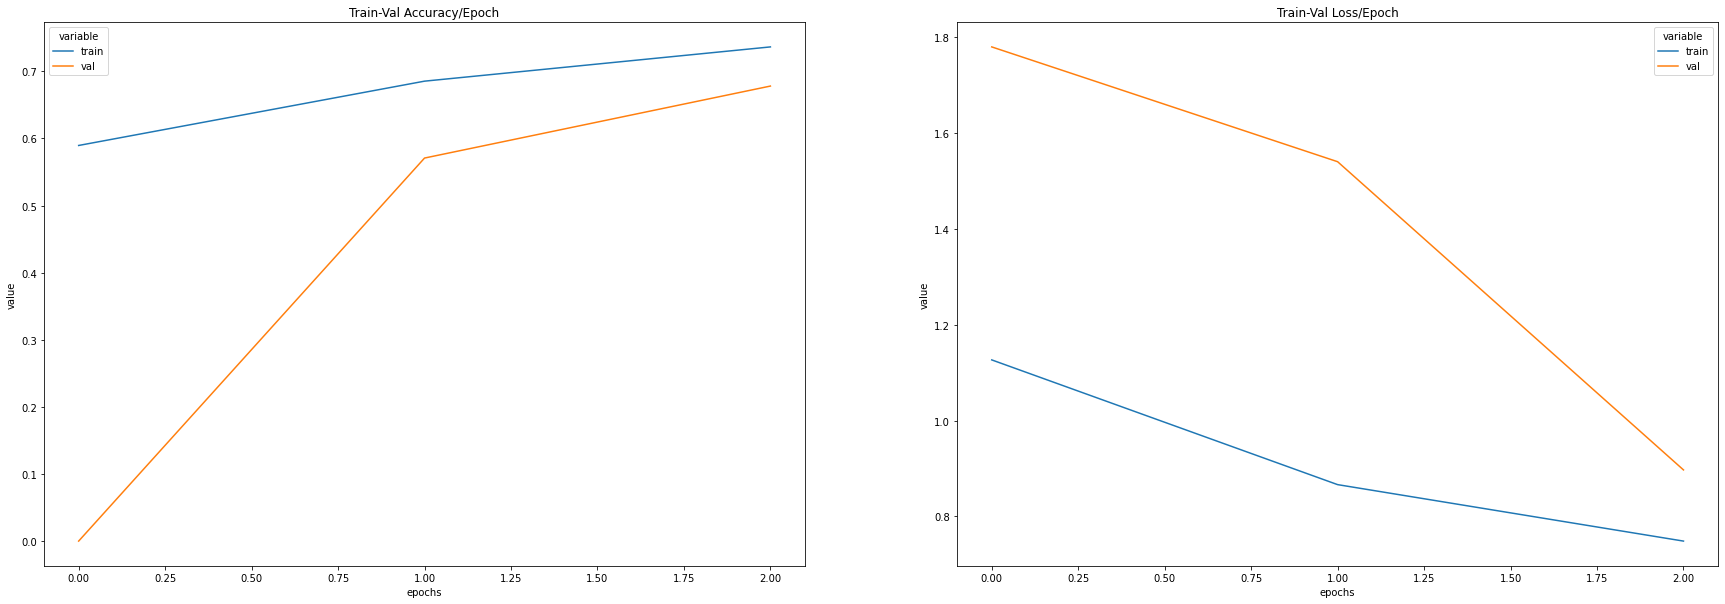

In [ ]:
plotter = kplt.PlotHelper()
plotter.show_training_results(acc_history, loss_history)

Para probar el modelo, se ejecuta el metodo _test_ el cual regresa una matriz de confusion.

                             precision    recall  f1-score   support

  a-iib_weddellite_surfaces       0.51      0.67      0.58        57
  b-iib_weddellite_sections       0.45      0.40      0.43        25
c-iiib_acide_urique_surface       0.61      0.38      0.47        29
d-iiib_acide_urique_section       0.84      0.66      0.74        62
    e-ia-whewellite_surface       0.87      0.88      0.88        52
    f-ia-whewellite_section       0.89      0.99      0.93        71

                   accuracy                           0.73       296
                  macro avg       0.69      0.66      0.67       296
               weighted avg       0.74      0.73      0.73       296

--------------------------------------------------------------------------------



/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The testing_epoch_end should not return anything as of 9.1.to log, use self.log(...) or self.write(...) directly in the LightningModule
  warnings.warn(*args, **kwargs)


1

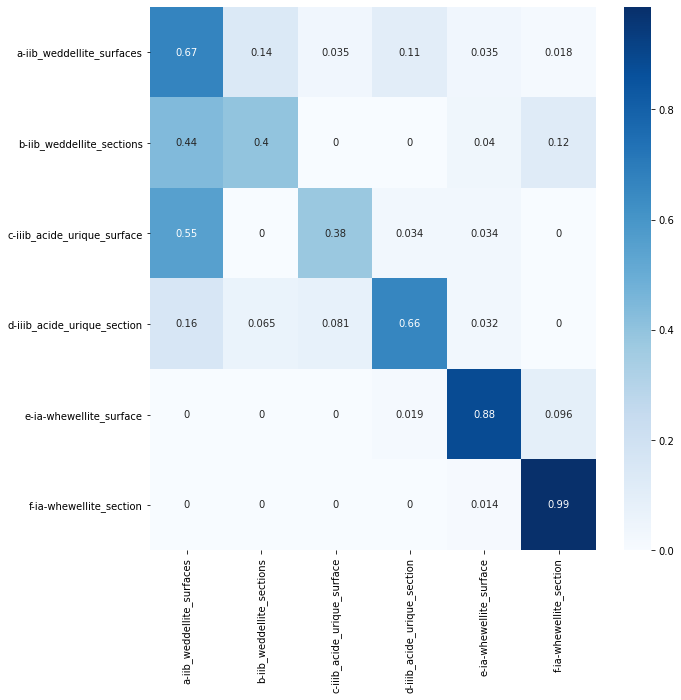

In [ ]:
trainer.test(model=model, datamodule=loader)

De igual forma, la clase permite generar la cuva ROC. Recibiendo como parametros las clases predecidas para el dataset de _test_ (test_y_pred), las clases esperadas y el nombre de las clases (get_class_indices).

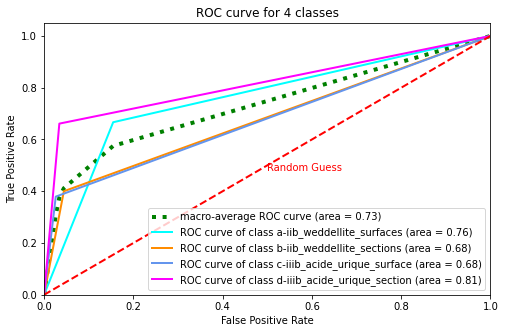

In [ ]:
plotter.plot_roc(model.test_y(), model.test_y_pred(), 4,
                 'ROC curve for 4 classes', loader.get_class_indices())

## Como guardar un modelo

In [ ]:
trainer.save_checkpoint("example.ckpt")

## Como cargar un modelo

              precision    recall  f1-score   support

           0       0.51      0.67      0.58        57
           1       0.45      0.40      0.43        25
           2       0.61      0.38      0.47        29
           3       0.84      0.66      0.74        62
           4       0.87      0.88      0.88        52
           5       0.89      0.99      0.93        71

    accuracy                           0.73       296
   macro avg       0.69      0.66      0.67       296
weighted avg       0.74      0.73      0.73       296

--------------------------------------------------------------------------------



1

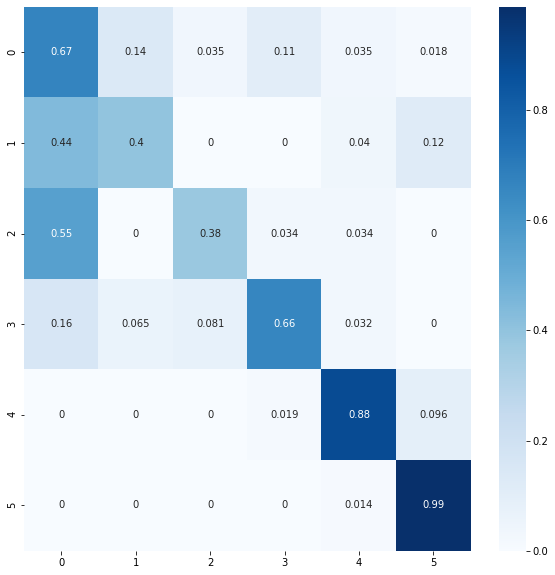

In [ ]:
new_model = Resnet34Model.load_from_checkpoint(checkpoint_path="example.ckpt")
trainer.test(model=new_model, datamodule=loader)

Como referencia, podemos ver como se comporta un modelo que no ha sido entrenado:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.09      1.00      0.16        25
           2       0.00      0.00      0.00        29
           3       0.00      0.00      0.00        62
           4       0.00      0.00      0.00        52
           5       0.00      0.00      0.00        71

    accuracy                           0.08       296
   macro avg       0.01      0.17      0.03       296
weighted avg       0.01      0.08      0.01       296

--------------------------------------------------------------------------------



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1

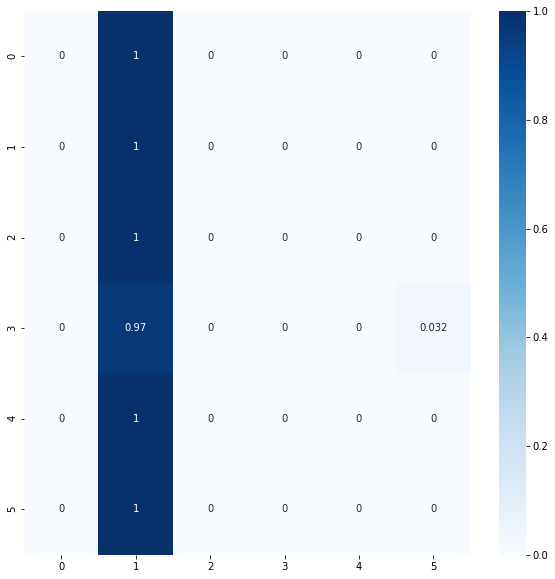

In [ ]:
not_trained_model = Resnet34Model(hparams={"lr": 0.0006}, num_classes=6, pretrained=True, seed=0)
trainer.test(model=not_trained_model, datamodule=loader)